1. Install and import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 

2. Load Data

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"
df=pd.read_csv(url)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


3. Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [6]:
df.groupby(['stabf']).mean()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
stabf,,,,,,,,,,,,,
stable,4.394799,4.353362,4.385360,4.378495,3.740077,-1.253549,-1.249626,-1.236902,0.453035,0.445872,0.440618,0.450390,-0.024798
unstable,5.735239,5.758752,5.740601,5.744485,3.755630,-1.247987,-1.250212,-1.257431,0.565832,0.569897,0.572879,0.567334,0.038727


<AxesSubplot:xlabel='stabf', ylabel='tau1'>

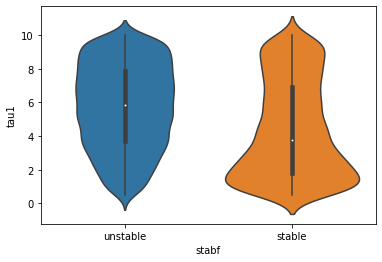

In [7]:
sns.violinplot(x='stabf',y='tau1',data=df)

<AxesSubplot:xlabel='stabf', ylabel='stab'>

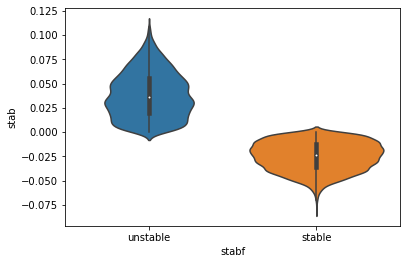

In [8]:
sns.violinplot(x='stabf',y='stab',data=df)

<AxesSubplot:xlabel='stabf', ylabel='tau2'>

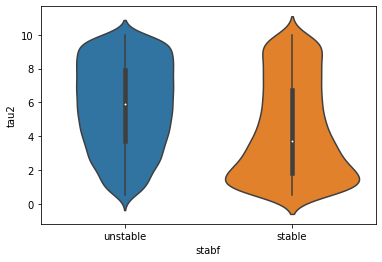

In [9]:
sns.violinplot(x='stabf',y='tau2',data=df)

<AxesSubplot:xlabel='stabf', ylabel='tau3'>

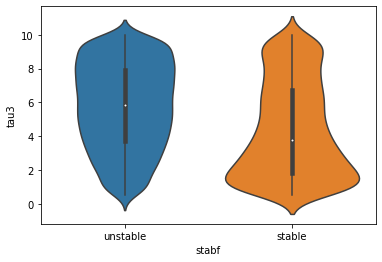

In [10]:
sns.violinplot(x='stabf',y='tau3',data=df)

<AxesSubplot:xlabel='stabf', ylabel='tau4'>

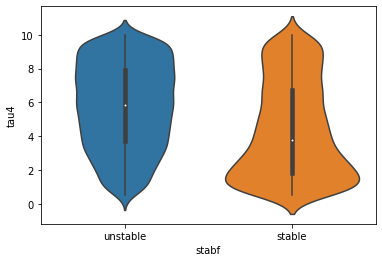

In [11]:
sns.violinplot(x='stabf',y='tau4',data=df)

<AxesSubplot:xlabel='stabf', ylabel='p1'>

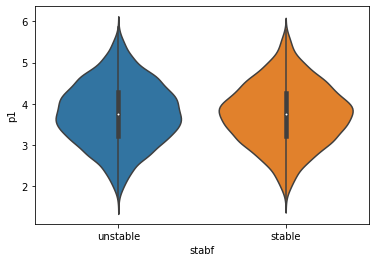

In [12]:
sns.violinplot(x='stabf',y='p1',data=df)

<AxesSubplot:xlabel='stabf', ylabel='p2'>

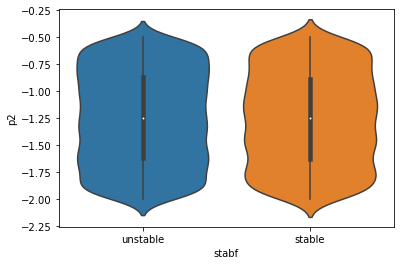

In [13]:
sns.violinplot(x='stabf',y='p2',data=df)

<AxesSubplot:xlabel='stabf', ylabel='p3'>

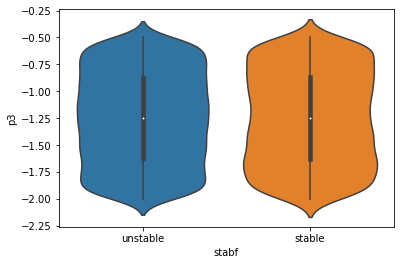

In [14]:
sns.violinplot(x='stabf',y='p3',data=df)

<AxesSubplot:xlabel='stabf', ylabel='p4'>

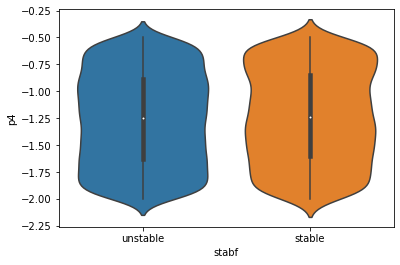

In [15]:
sns.violinplot(x='stabf',y='p4',data=df)

<AxesSubplot:xlabel='stabf', ylabel='g1'>

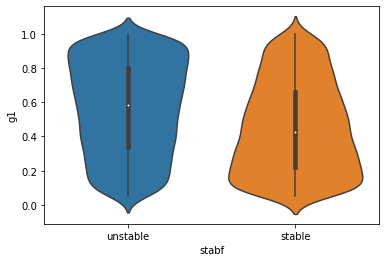

In [16]:
sns.violinplot(x='stabf',y='g1',data=df)

<AxesSubplot:xlabel='stabf', ylabel='g2'>

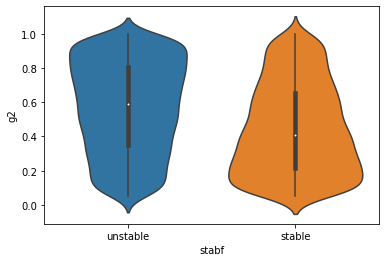

In [17]:
sns.violinplot(x='stabf',y='g2',data=df)

<AxesSubplot:xlabel='stabf', ylabel='g3'>

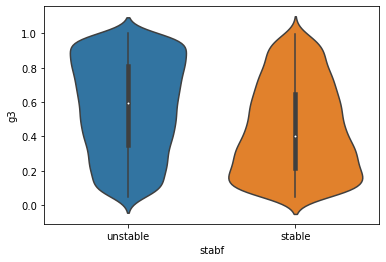

In [18]:
sns.violinplot(x='stabf',y='g3',data=df)

In [19]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

<AxesSubplot:xlabel='stabf', ylabel='count'>

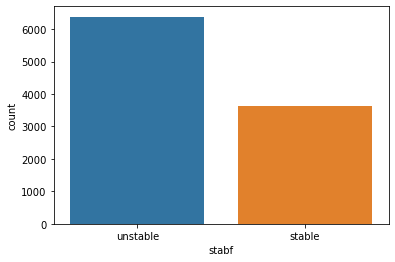

In [20]:
#Countplot the number of stabf
sns.countplot(x=df['stabf'])

<AxesSubplot:xlabel='stab', ylabel='Count'>

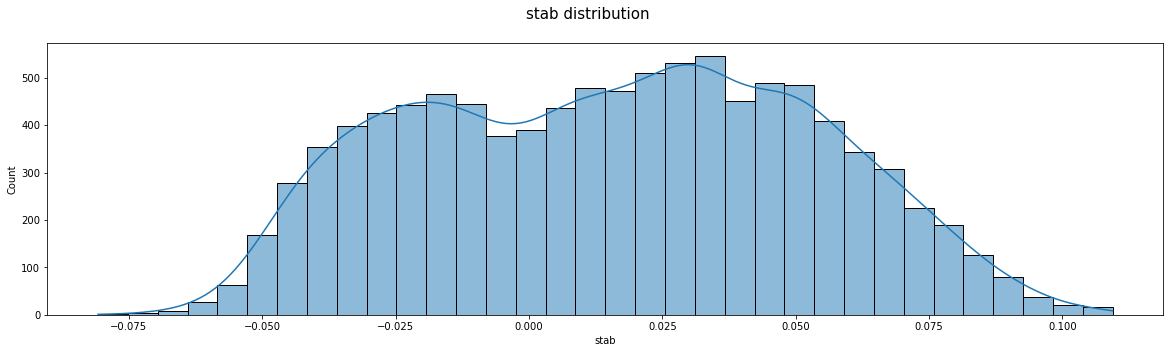

In [21]:
#Plot stab distribution
fig,ax =plt.subplots(figsize=(20,5))
fig.suptitle('stab distribution',size=15)
sns.histplot(x=df.stab,kde=True)

array([[<AxesSubplot:title={'center':'tau1'}>,
        <AxesSubplot:title={'center':'tau2'}>,
        <AxesSubplot:title={'center':'tau3'}>,
        <AxesSubplot:title={'center':'tau4'}>],
       [<AxesSubplot:title={'center':'p1'}>,
        <AxesSubplot:title={'center':'p2'}>,
        <AxesSubplot:title={'center':'p3'}>,
        <AxesSubplot:title={'center':'p4'}>],
       [<AxesSubplot:title={'center':'g1'}>,
        <AxesSubplot:title={'center':'g2'}>,
        <AxesSubplot:title={'center':'g3'}>,
        <AxesSubplot:title={'center':'g4'}>],
       [<AxesSubplot:title={'center':'stab'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

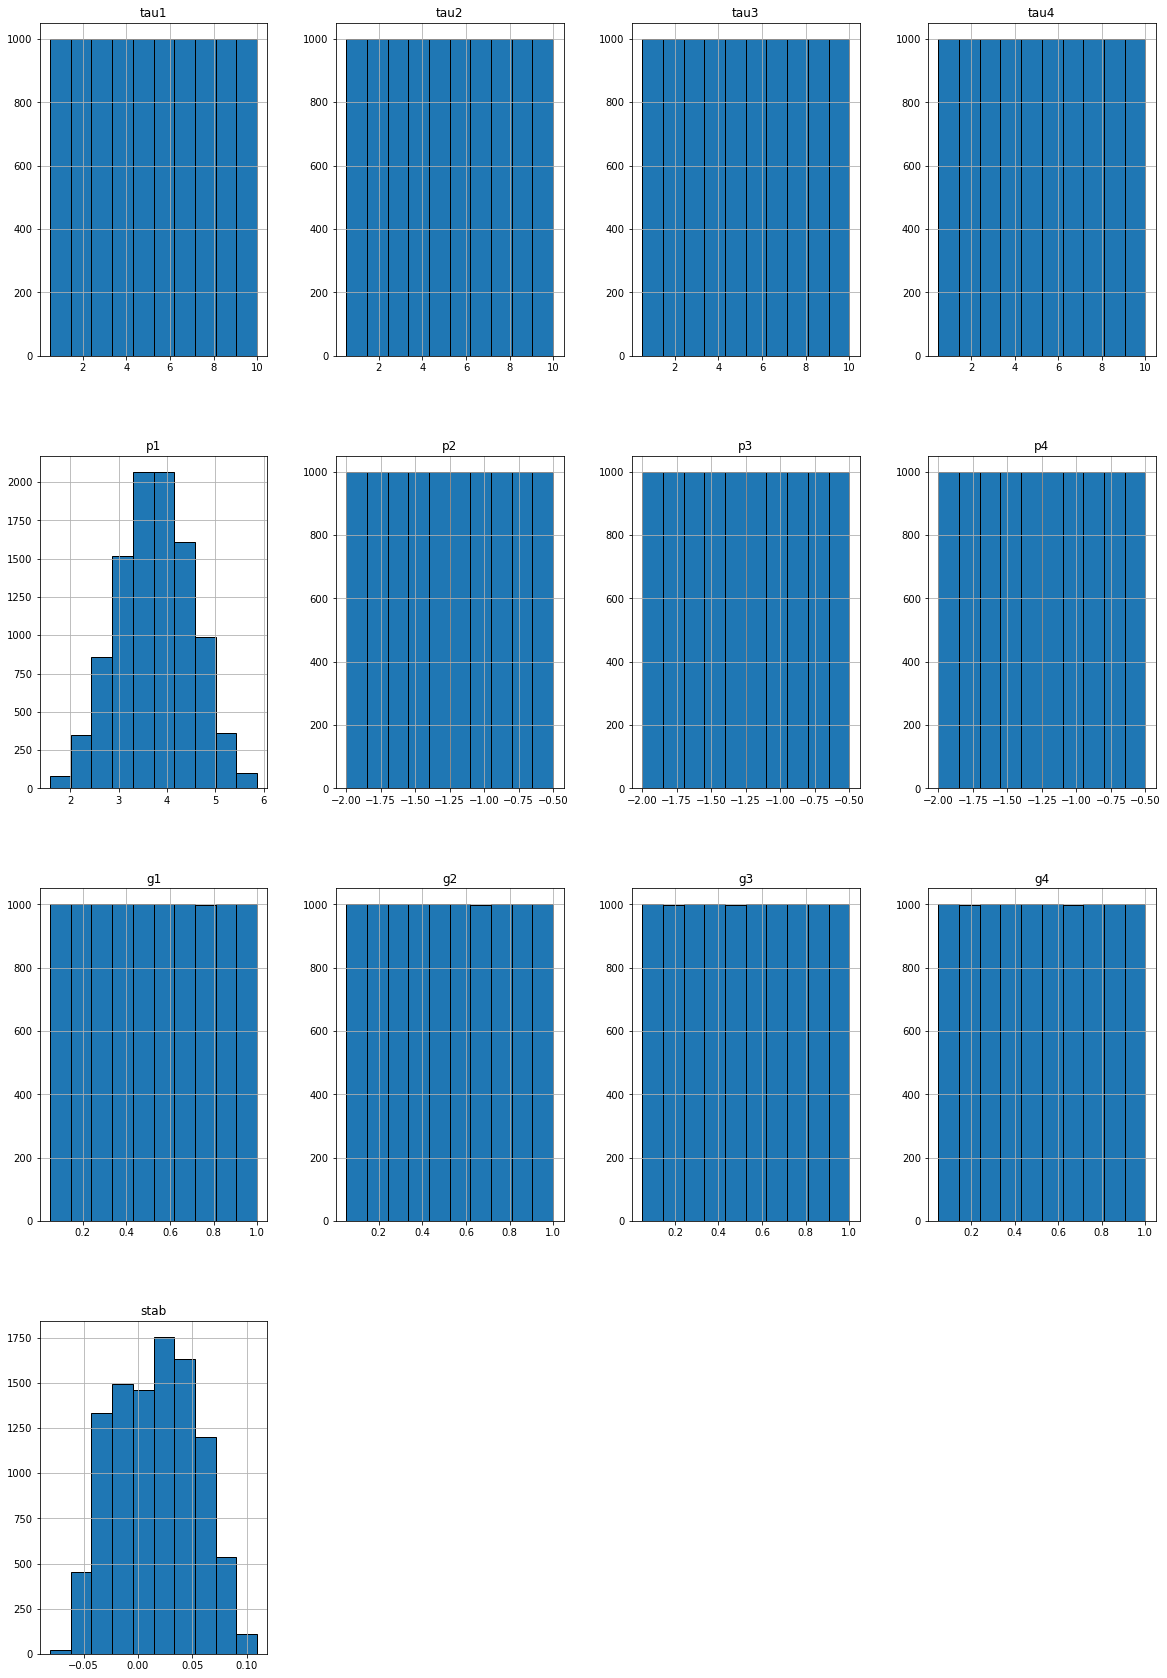

In [22]:
df.hist(figsize=(20,30),ec="k")

In [23]:
df.corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


Text(0.5, 1.0, 'Korrelationsmatrix')

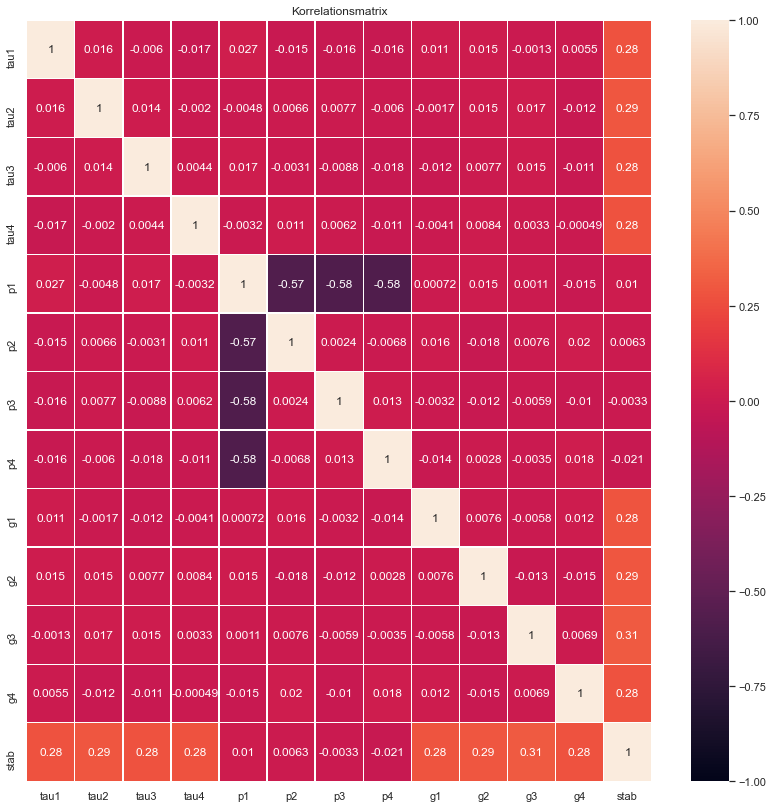

In [24]:
import seaborn as sns
#relationship analysis
sns.set(font_scale=1.0)
plt.figure(figsize = (14,14))
corelation=df.corr()
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True,linewidths=.4,vmin=-1,vmax=1)
plt.title("Korrelationsmatrix")

In [28]:
df_new=df.drop(['tau2','tau3','tau4','p2','p3','p4','g2','g3','g4'], axis=1)
df_new

,tau1,p1,g1,stab,stabf
0,2.959060,3.763085,0.650456,0.055347,unstable
1,9.304097,5.067812,0.413441,-0.005957,stable
2,8.971707,3.405158,0.163041,0.003471,unstable
3,0.716415,3.963791,0.446209,0.028871,unstable
4,3.134112,3.525811,0.797110,0.049860,unstable
...,...,...,...,...,...
9995,2.930406,3.343416,0.601709,0.023892,unstable
9996,3.392299,4.349512,0.502079,-0.025803,stable
9997,2.364034,4.299976,0.487838,-0.031810,stable
9998,9.631511,2.514755,0.365246,0.037789,unstable


In [29]:
df_new.corr()

,tau1,p1,g1,stab
tau1,1.000000,0.027183,0.010521,0.275761
p1,0.027183,1.000000,0.000721,0.010278
g1,0.010521,0.000721,1.000000,0.282774
stab,0.275761,0.010278,0.282774,1.000000


array([[<AxesSubplot:title={'center':'tau1'}>,
        <AxesSubplot:title={'center':'p1'}>],
       [<AxesSubplot:title={'center':'g1'}>,
        <AxesSubplot:title={'center':'stab'}>]], dtype=object)

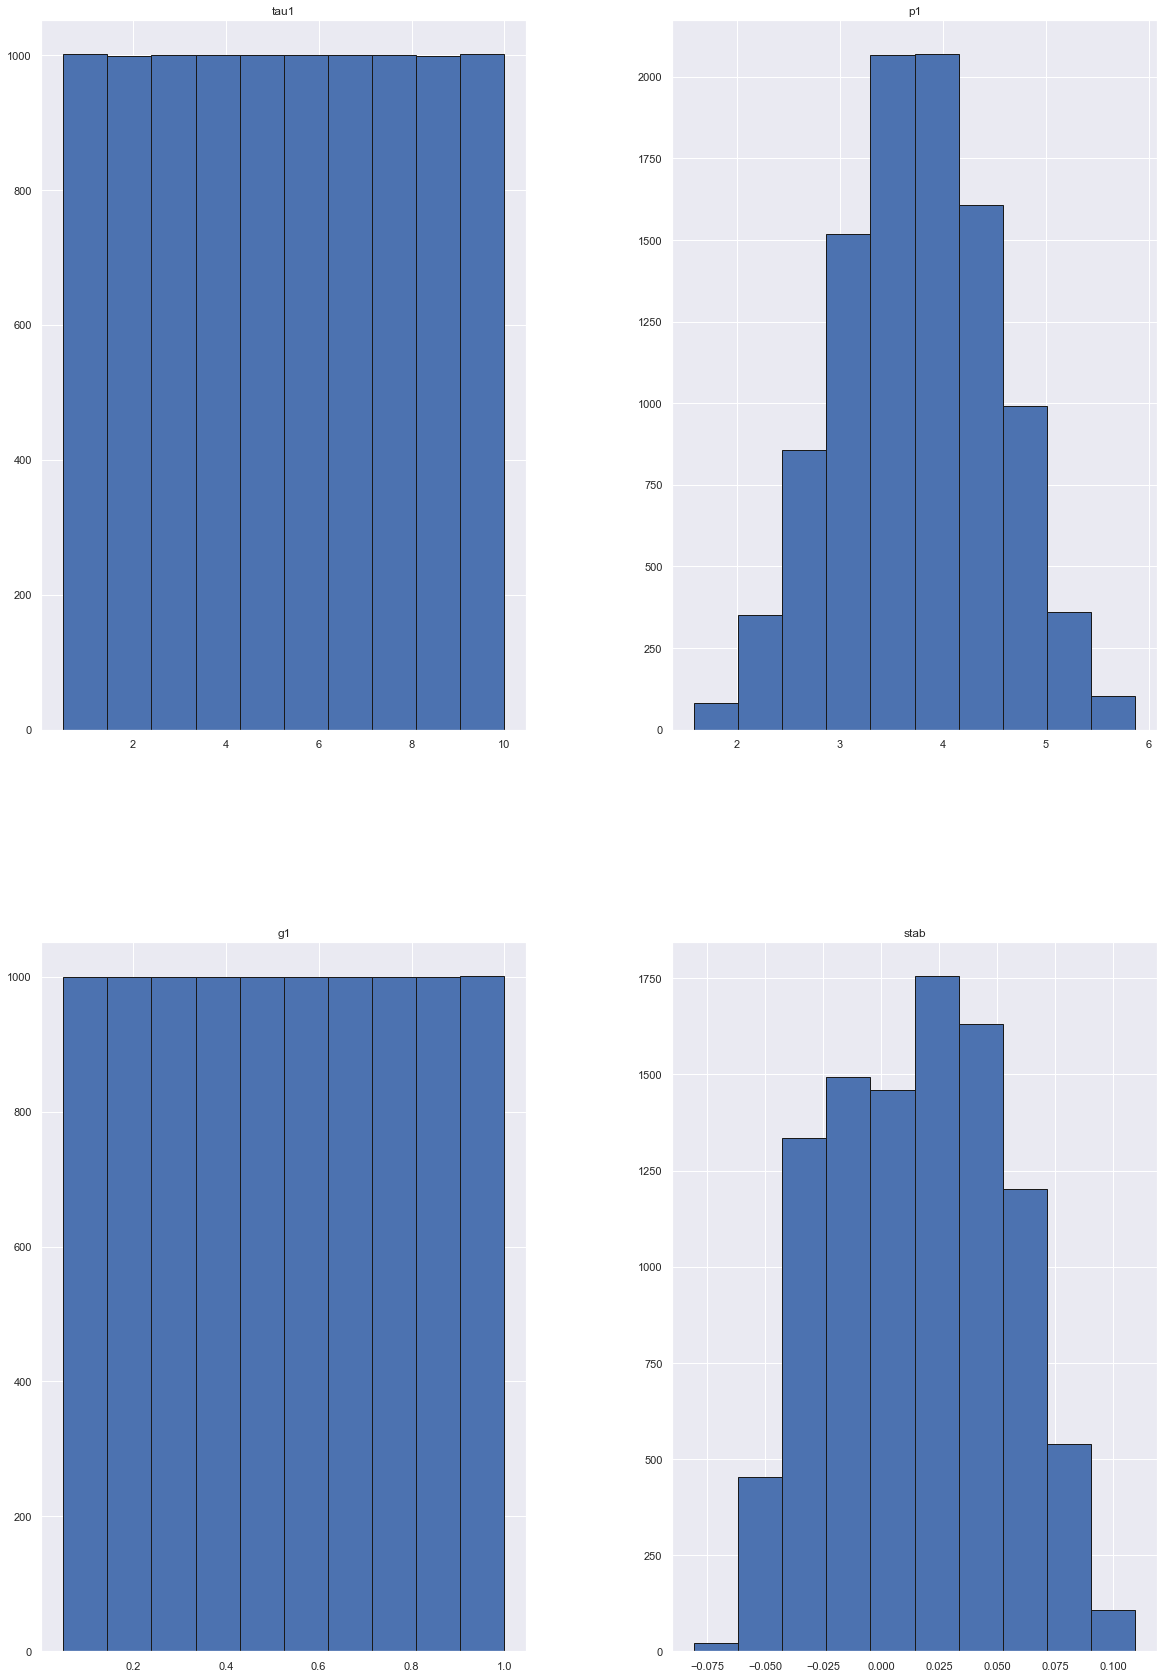

In [30]:
df_new.hist(figsize=(20,30),ec="k")

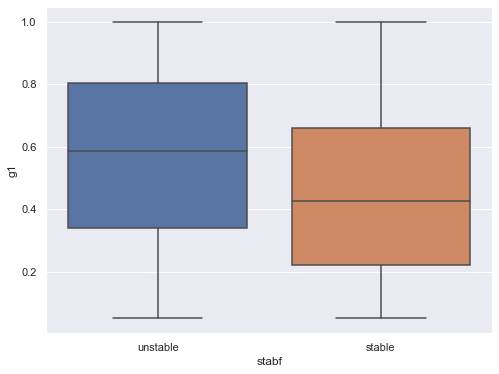

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_new['stabf'],y=df_new['g1'])
plt.show()

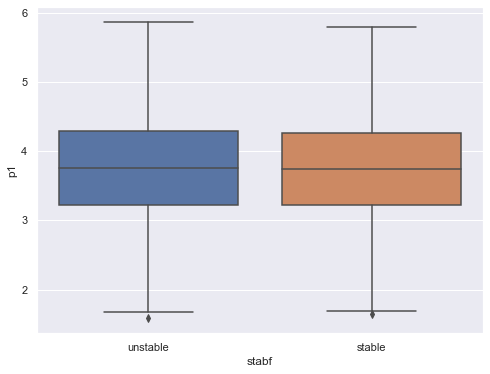

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_new['stabf'],y=df_new['p1'])
plt.show()

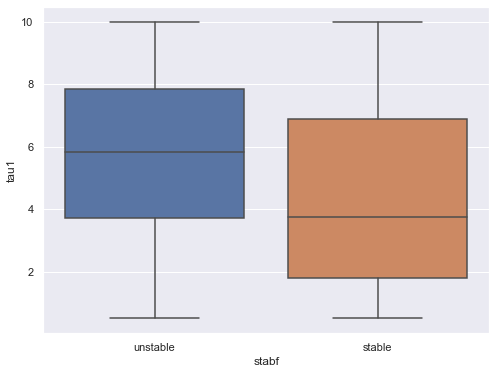

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_new['stabf'],y=df_new['tau1'])
plt.show()

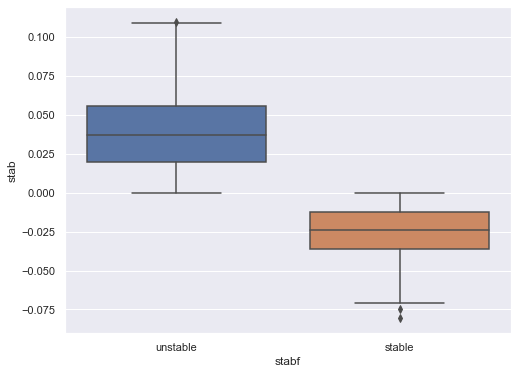

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_new['stabf'],y=df_new['stab'])
plt.show()

Text(0.5, 1.0, 'Korrelationsmatrix')

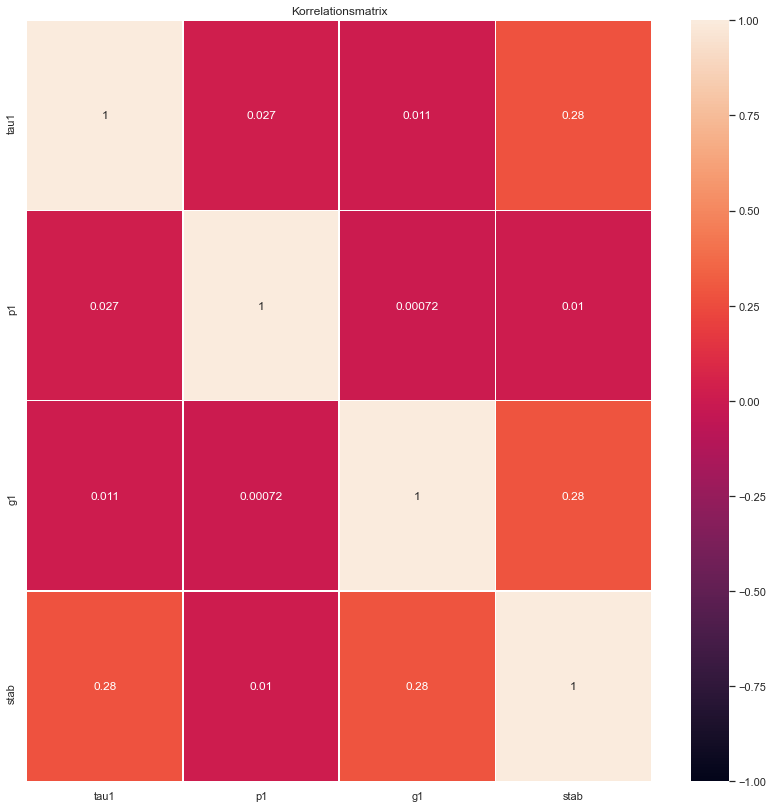

In [37]:
import seaborn as sns
#relationship analysis
sns.set(font_scale=1.0)
plt.figure(figsize = (14,14))
corelation=df_new.corr()
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True,linewidths=.4,vmin=-1,vmax=1)
plt.title("Korrelationsmatrix")

In [38]:
df_new

,tau1,p1,g1,stab,stabf
0,2.959060,3.763085,0.650456,0.055347,unstable
1,9.304097,5.067812,0.413441,-0.005957,stable
2,8.971707,3.405158,0.163041,0.003471,unstable
3,0.716415,3.963791,0.446209,0.028871,unstable
4,3.134112,3.525811,0.797110,0.049860,unstable
...,...,...,...,...,...
9995,2.930406,3.343416,0.601709,0.023892,unstable
9996,3.392299,4.349512,0.502079,-0.025803,stable
9997,2.364034,4.299976,0.487838,-0.031810,stable
9998,9.631511,2.514755,0.365246,0.037789,unstable


In [44]:
from sklearn.preprocessing import OrdinalEncoder
obj_df = df.select_dtypes(include=['object']).copy()
ord_enc = OrdinalEncoder()
obj_df["Target"] = ord_enc.fit_transform(obj_df[["stabf"]])
obj_df[["stabf", "Target"]].head(11)
df_new=df_new.drop(['stabf'], axis=1)
df_new["Target"]=obj_df["Target"]
df_new

,tau1,p1,g1,stab,Target
0,2.959060,3.763085,0.650456,0.055347,1.0
1,9.304097,5.067812,0.413441,-0.005957,0.0
2,8.971707,3.405158,0.163041,0.003471,1.0
3,0.716415,3.963791,0.446209,0.028871,1.0
4,3.134112,3.525811,0.797110,0.049860,1.0
...,...,...,...,...,...
9995,2.930406,3.343416,0.601709,0.023892,1.0
9996,3.392299,4.349512,0.502079,-0.025803,0.0
9997,2.364034,4.299976,0.487838,-0.031810,0.0
9998,9.631511,2.514755,0.365246,0.037789,1.0


Text(0.5, 1.0, 'Korrelationsmatrix')

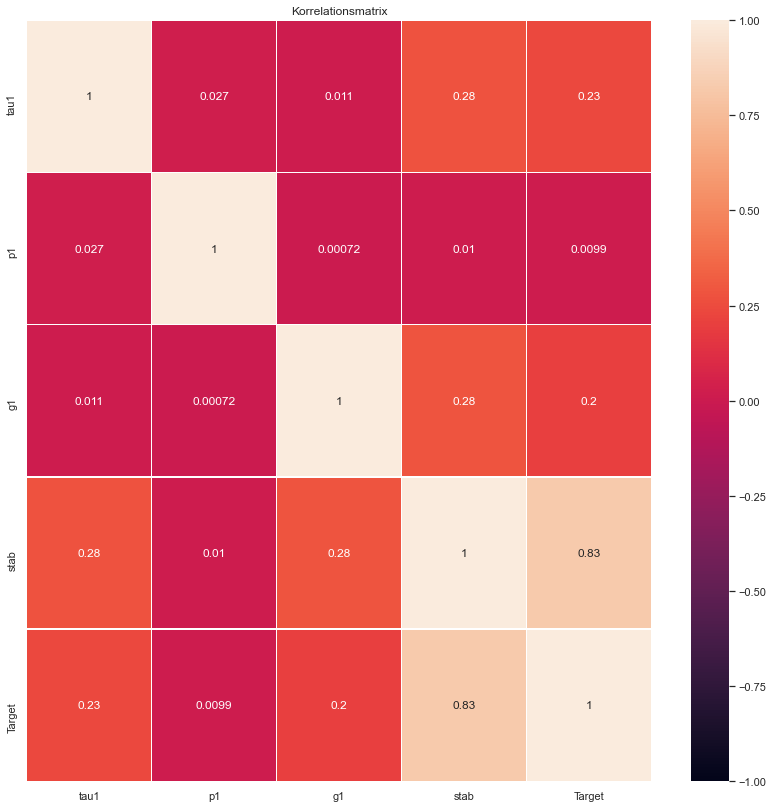

In [45]:
import seaborn as sns
#relationship analysis
sns.set(font_scale=1.0)
plt.figure(figsize = (14,14))
corelation=df_new.corr()
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True,linewidths=.4,vmin=-1,vmax=1)
plt.title("Korrelationsmatrix")

In [51]:
x=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [52]:
print(x)

[[ 2.95906002e+00  3.76308477e+00  6.50456461e-01  5.53474892e-02]
 [ 9.30409723e+00  5.06781210e+00  4.13440568e-01 -5.95746433e-03]
 [ 8.97170691e+00  3.40515818e+00  1.63041039e-01  3.47087905e-03]
 ...
 [ 2.36403419e+00  4.29997561e+00  4.87837901e-01 -3.18098881e-02]
 [ 9.63151069e+00  2.51475476e+00  3.65246004e-01  3.77888091e-02]
 [ 6.53052662e+00  3.49280713e+00  7.30555568e-02  4.52633082e-02]]


In [53]:
print(y)

[1. 0. 1. ... 0. 1. 1.]


Modellierung:

Spliting the dataset into the Training set and Test set

In [65]:
# Bibliotheken laden
from sklearn.model_selection import train_test_split
# Datenaufteilung
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)


[[ 7.33614263e-01  3.68593165e+00  5.90233071e-02 -3.64855331e-02]
 [ 5.82909228e+00  2.58370388e+00  7.15382705e-01  5.58763020e-02]
 [ 9.95451515e+00  3.38065631e+00  2.25095107e-01  3.65836081e-02]
 ...
 [ 2.03542147e+00  4.25642500e+00  6.91136392e-02 -7.51555964e-03]
 [ 8.58407885e-01  3.44537364e+00  5.38764320e-01 -5.64150552e-02]
 [ 8.28362258e+00  3.87869977e+00  4.84302519e-01  3.01159072e-02]]


In [66]:
print(x_test)

[[ 2.92725031e+00  2.55487282e+00  1.23158115e-01  2.08723395e-02]
 [ 8.71779675e+00  4.68892453e+00  2.41478773e-01 -2.00865909e-02]
 [ 9.46911157e+00  4.13745054e+00  5.08570178e-01  2.55710679e-02]
 ...
 [ 3.18147601e+00  3.82321365e+00  3.26407880e-01  4.62865644e-02]
 [ 8.70441775e+00  2.41366494e+00  6.90355092e-01  3.58535544e-02]
 [ 9.60683364e+00  4.24872098e+00  3.46592610e-01  5.85599800e-03]]


In [67]:
print(y_train)

[0. 1. 1. ... 0. 0. 1.]


In [68]:
print(y_test)

[1. 0. 1. ... 1. 1. 1.]


Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [70]:
print(x_train)

[[-1.64853458 -0.08687497 -1.70019629 -1.42009312]
 [ 0.20738286 -1.55937138  0.69735681  1.0875973 ]
 [ 1.70997874 -0.4947007  -1.09356833  0.56378675]
 ...
 [-1.17437952  0.67526278 -1.66333827 -0.63353745]
 [-1.60308121 -0.40824304  0.05220423 -1.96119401]
 [ 1.10139233  0.17064926 -0.14673412  0.38818401]]


In [71]:
print(x_test)

[[-0.84955019 -1.59788759 -1.46592432  0.13721448]
 [ 1.25953087  1.25305082 -1.03372199 -0.97485001]
 [ 1.53318101  0.51632153 -0.05808909  0.26478834]
 ...
 [-0.75695399  0.09652383 -0.7234925   0.82722901]
 [ 1.25465785 -1.78653107  0.60593581  0.54396527]
 [ 1.58334329  0.66497077 -0.64976161 -0.27049002]]


Training the logistic Regression model on the Training set

In [72]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=1)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=1)

Predicting the Test set results

In [73]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Making the Confusion Matrix

[[ 925    6]
 [   0 1569]]
0.9976
0.9961904761904762
1.0
0.998091603053435
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       931
         1.0       1.00      1.00      1.00      1569

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



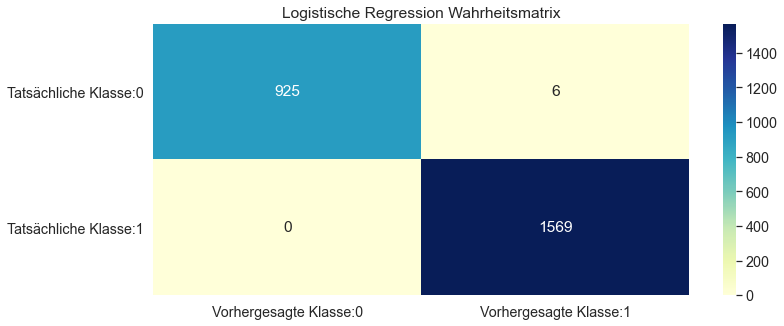

In [74]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
print(cm)
cm_m=pd.DataFrame(data=cm,columns=['Vorhergesagte Klasse:0','Vorhergesagte Klasse:1'],index=['Tatsächliche Klasse:0','Tatsächliche Klasse:1'])
sns.set(font_scale=1.3)
plt.figure(figsize = (12,5))
plt.title("Logistische Regression Wahrheitsmatrix")
cm_display = sns.heatmap(cm_m, annot=True,fmt='d',cmap="YlGnBu")
ac_score=accuracy_score(y_test,y_pred)
print(ac_score)
ps=precision_score(y_test, y_pred)
print(ps)
rs=recall_score(y_test, y_pred)
print(rs)
f1=f1_score(y_test, y_pred)
print(f1)
print(classification_report(y_test, y_pred))

Training the K-NN model on the Training set

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Predicting the Test set results

In [76]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


[[ 906   25]
 [  23 1546]]
0.9808
0.9840865690642903
0.9853409815168898
0.9847133757961783
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       931
         1.0       0.98      0.99      0.98      1569

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



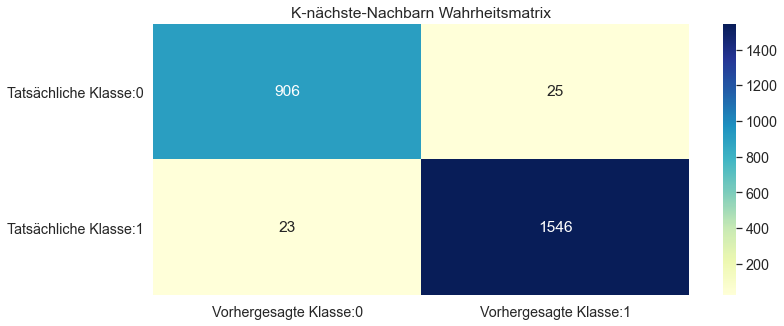

In [77]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
print(cm)
cm_m=pd.DataFrame(data=cm,columns=['Vorhergesagte Klasse:0','Vorhergesagte Klasse:1'],index=['Tatsächliche Klasse:0','Tatsächliche Klasse:1'])
sns.set(font_scale=1.3)
plt.figure(figsize = (12,5))
plt.title("K-nächste-Nachbarn Wahrheitsmatrix")
cm_display = sns.heatmap(cm_m, annot=True,fmt='d',cmap="YlGnBu")
ac_score=accuracy_score(y_test,y_pred)
print(ac_score)
ps=precision_score(y_test, y_pred)
print(ps)
rs=recall_score(y_test, y_pred)
print(rs)
f1=f1_score(y_test, y_pred)
print(f1)
print(classification_report(y_test, y_pred))

Training the Decision Tree Classification model on the Training set

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the Test set results

In [79]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Making the Confusion Matrix

[[ 931    0]
 [   1 1568]]
0.9996
1.0
0.9993626513702996
0.999681224099458
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       931
         1.0       1.00      1.00      1.00      1569

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



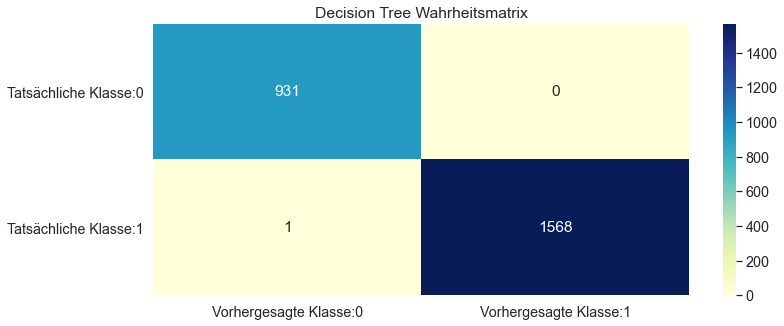

In [83]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
print(cm)
cm_m=pd.DataFrame(data=cm,columns=['Vorhergesagte Klasse:0','Vorhergesagte Klasse:1'],index=['Tatsächliche Klasse:0','Tatsächliche Klasse:1'])
sns.set(font_scale=1.3)
plt.figure(figsize = (12,5))
plt.title("Decision Tree Wahrheitsmatrix")
cm_display = sns.heatmap(cm_m, annot=True,fmt='d',cmap="YlGnBu")
ac_score=accuracy_score(y_test,y_pred)
print(ac_score)
ps=precision_score(y_test, y_pred)
print(ps)
rs=recall_score(y_test, y_pred)
print(rs)
f1=f1_score(y_test, y_pred)
print(f1)
print(classification_report(y_test, y_pred))

Training the Naive Bayes model on the Training set

In [84]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

Predicting the Test set results

In [85]:
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


[[ 901   30]
 [  19 1550]]
0.9804
0.9810126582278481
0.9878903760356915
0.9844395046046364
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       931
         1.0       0.98      0.99      0.98      1569

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



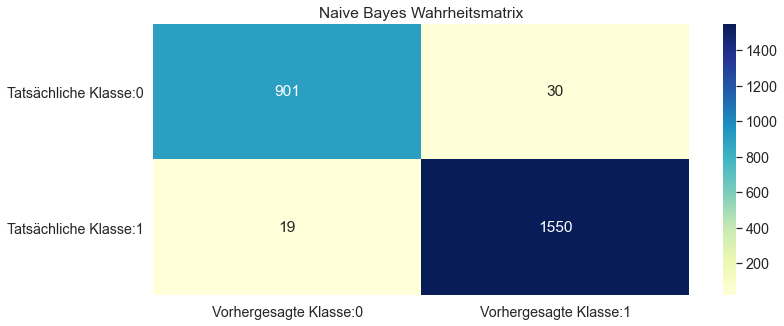

In [86]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
print(cm)
cm_m=pd.DataFrame(data=cm,columns=['Vorhergesagte Klasse:0','Vorhergesagte Klasse:1'],index=['Tatsächliche Klasse:0','Tatsächliche Klasse:1'])
sns.set(font_scale=1.3)
plt.figure(figsize = (12,5))
plt.title("Naive Bayes Wahrheitsmatrix")
cm_display = sns.heatmap(cm_m, annot=True,fmt='d',cmap="YlGnBu")
ac_score=accuracy_score(y_test,y_pred)
print(ac_score)
ps=precision_score(y_test, y_pred)
print(ps)
rs=recall_score(y_test, y_pred)
print(rs)
f1=f1_score(y_test, y_pred)
print(f1)
print(classification_report(y_test, y_pred))